## 数组广播机制

In [1]:
import numpy as np

正常的加法：

In [2]:
a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])
b = np.array([[ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2]])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

将 `b` 的值变成一维的 `[0,1,2]` 之后的加法：

In [3]:
b = np.array([0,1,2])

a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

结果一样，虽然两个数组的维数不一样，但是 Numpy 检测到 `b` 的维度与 `a` 的维度匹配，
所以将 b 扩展为之前的形式，得到相同的形状。

对于更高维度，这样的扩展依然有效。

如果我们再将 `a` 变成一个列向量呢？

In [4]:
a = np.array([0,10,20,30])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [30]])

In [5]:
b

array([0, 1, 2])

In [6]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

可以看到，虽然两者的维度并不相同，但是Numpy还是根据两者的维度，自动将它们进行扩展然后进行计算。

对于 Numpy 来说，维度匹配当且仅当：

- 维度相同
- 有一个的维度是1

匹配会从最后一维开始进行，直到某一个的维度全部匹配为止，因此对于以下情况，Numpy 都会进行相应的匹配：

|  A  |  B  |  Result  |
|  ----  |  ----  |  ----  |
|  3d array: 256 x 256 x 3  |  1d array: 3  |  3d array: 256 x 256 x 3  |
|  4d array: 8 x 1 x 6 x 1  |  3d array: 7 x 1 x 5  |  3d array: 8 x 7 x 6 x 5  |
|  3d array: 5 x 4 x 3  |  1d array: 1  |  3d array: 5 x 4 x 3  |
|  3d array: 15 x 4 x 13  |  1d array: 15 x 1 x 13  |  3d array: 15 x 4 x 13  |
|  2d array: 4 x 1  |  1d array: 3  |  2d array: 4 x 3  |

匹配成功后，Numpy 会进行运算得到相应的结果。

当然，如果相应的维度不匹配，那么Numpy会报错：

In [7]:
a = np.array([0,10,20,30])
a.shape

(4,)

In [8]:
b.shape

(3,)

In [9]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

将 a 转换为列向量，还是可以计算出结果：

In [10]:
a[:, np.newaxis] + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### 例子

In [11]:
x = np.linspace(-.5,.5, 21)
print(x.shape)
x

(21,)


array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
       -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
        0.4 ,  0.45,  0.5 ])

In [12]:
y = x[:, np.newaxis]
print(y.shape)
y

(21, 1)


array([[-0.5 ],
       [-0.45],
       [-0.4 ],
       [-0.35],
       [-0.3 ],
       [-0.25],
       [-0.2 ],
       [-0.15],
       [-0.1 ],
       [-0.05],
       [ 0.  ],
       [ 0.05],
       [ 0.1 ],
       [ 0.15],
       [ 0.2 ],
       [ 0.25],
       [ 0.3 ],
       [ 0.35],
       [ 0.4 ],
       [ 0.45],
       [ 0.5 ]])

先形成一个 21 乘 21 的网格，再计算网格到原点的距离：

In [13]:
radius = np.sqrt(x ** 2 + y ** 2)
radius

array([[0.70710678, 0.6726812 , 0.64031242, 0.61032778, 0.58309519,
        0.55901699, 0.53851648, 0.52201533, 0.50990195, 0.50249378,
        0.5       , 0.50249378, 0.50990195, 0.52201533, 0.53851648,
        0.55901699, 0.58309519, 0.61032778, 0.64031242, 0.6726812 ,
        0.70710678],
       [0.6726812 , 0.6363961 , 0.60207973, 0.57008771, 0.54083269,
        0.51478151, 0.49244289, 0.47434165, 0.46097722, 0.45276926,
        0.45      , 0.45276926, 0.46097722, 0.47434165, 0.49244289,
        0.51478151, 0.54083269, 0.57008771, 0.60207973, 0.6363961 ,
        0.6726812 ],
       [0.64031242, 0.60207973, 0.56568542, 0.53150729, 0.5       ,
        0.47169906, 0.4472136 , 0.42720019, 0.41231056, 0.40311289,
        0.4       , 0.40311289, 0.41231056, 0.42720019, 0.4472136 ,
        0.47169906, 0.5       , 0.53150729, 0.56568542, 0.60207973,
        0.64031242],
       [0.61032778, 0.57008771, 0.53150729, 0.49497475, 0.46097722,
        0.43011626, 0.40311289, 0.38078866, 0.3640054

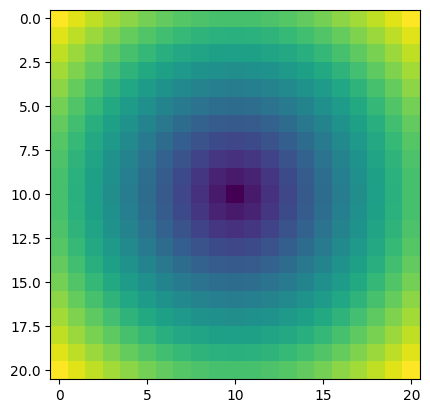

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(radius)
